# Change of Basis in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: Change of basis is the process of expressing vectors and linear transformations in different coordinate systems (bases) within the same vector space. It involves transforming coordinates from one basis to another, allowing for more convenient representations or computations. In AI/ML, change of basis is used in techniques like PCA, where data is projected onto new bases (principal components) for dimensionality reduction or feature extraction.

**Mathematical Definition**:
- A basis for a vector space $V$ (e.g., $\mathbb{R}^n$) is a set of linearly independent vectors $B = \{\mathbf{b}_1, \mathbf{b}_2, \dots, \mathbf{b}_n\}$ that span $V$.
- For two bases $B = \{\mathbf{b}_1, \dots, \mathbf{b}_n\}$ and $B' = \{\mathbf{b}'_1, \dots, \mathbf{b}'_n\}$, the change of basis matrix $\mathbf{P}$ (from $B$ to $B'$) has columns that are the coordinates of the $B'$ vectors expressed in $B$:
  $$
  \mathbf{P} = [ [\mathbf{b}'_1]_B \quad [\mathbf{b}'_2]_B \quad \dots \quad [\mathbf{b}'_n]_B ]
  $$
  where $[\mathbf{v}]_B$ denotes the coordinates of $\mathbf{v}$ in basis $B$.
- The inverse $\mathbf{P}^{-1}$ changes basis from $B'$ to $B$.

**Geometric Interpretation**: Changing basis is like viewing the same vector space from a different "grid" or coordinate system, where axes are defined by the new basis vectors.

**Examples**:
- Standard basis in $\mathbb{R}^2$: $\{[1, 0], [0, 1]\}$.
- New basis: $\{[1, 1], [1, -1]\}$.
- In ML, change of basis in PCA projects data from original features to principal components.

**Relevance in Mathematics**:
- **Coordinate Transformation**: Expresses vectors/transformations in optimal bases.
- **Diagonalization**: Simplifies matrices (e.g., Jordan form).
- **Geometric Flexibility**: Adapts to problem-specific coordinate systems.

**Relevance in AI/ML**:
- **Optimizes Representations**: Projects data to bases like principal components.
- **Simplifies Models**: Diagonalizes covariance matrices in PCA.
- **Handles Transformations**: Represents operations in different feature spaces.

**Applications Overview**:
- **PCA**: Changes basis to principal components.
- **Neural Networks**: Transforms inputs in layers to new bases.
- **Computer Graphics**: Changes basis for rotations/shears.
- **Quantum Computing**: Changes basis for qubit states.

## Core Concepts and Derivations
This section covers representing vectors and transformations in different bases, with formulas, derivations, and visualizations.

### 2.1 Representing Vectors in Different Bases
**Definition**: A vector $\mathbf{v}$ has coordinates $[\mathbf{v}]_B$ in basis $B$ and $[\mathbf{v}]_{B'}$ in basis $B'$.

**Formula**:
- $[\mathbf{v}]_B = \mathbf{P} [\mathbf{v}]_{B'}$ (coordinates in $B$ from $B'$).
- $[\mathbf{v}]_{B'} = \mathbf{P}^{-1} [\mathbf{v}]_B$ (coordinates in $B'$ from $B$).

**Derivation**:
- Let $\mathbf{v} = \sum c_i \mathbf{b}_i = \mathbf{B} \mathbf{c}$, where $\mathbf{B}$ is the matrix with $B$ vectors as columns, $\mathbf{c} = [\mathbf{v}]_B$.
- Similarly, $\mathbf{v} = \mathbf{B}' \mathbf{c}'$, $\mathbf{c}' = [\mathbf{v}]_{B'}$.
- Since $\mathbf{B}' = \mathbf{B} \mathbf{P}$, substitute: $\mathbf{v} = \mathbf{B} \mathbf{P} \mathbf{c}'$.
- Then $\mathbf{B} \mathbf{c} = \mathbf{B} \mathbf{P} \mathbf{c}' \implies \mathbf{c} = \mathbf{P} \mathbf{c}'$ (since $\mathbf{B}$ is invertible).

**Why Necessary**: Enables switching bases for simpler computations or interpretations.

**Example**: Standard basis $B = \{[1, 0], [0, 1]\}$, new basis $B' = \{[1, 1], [1, -1]\}$. $\mathbf{P} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$.

**ML Use-Case**: In PCA, change of basis projects data from original features to principal components.

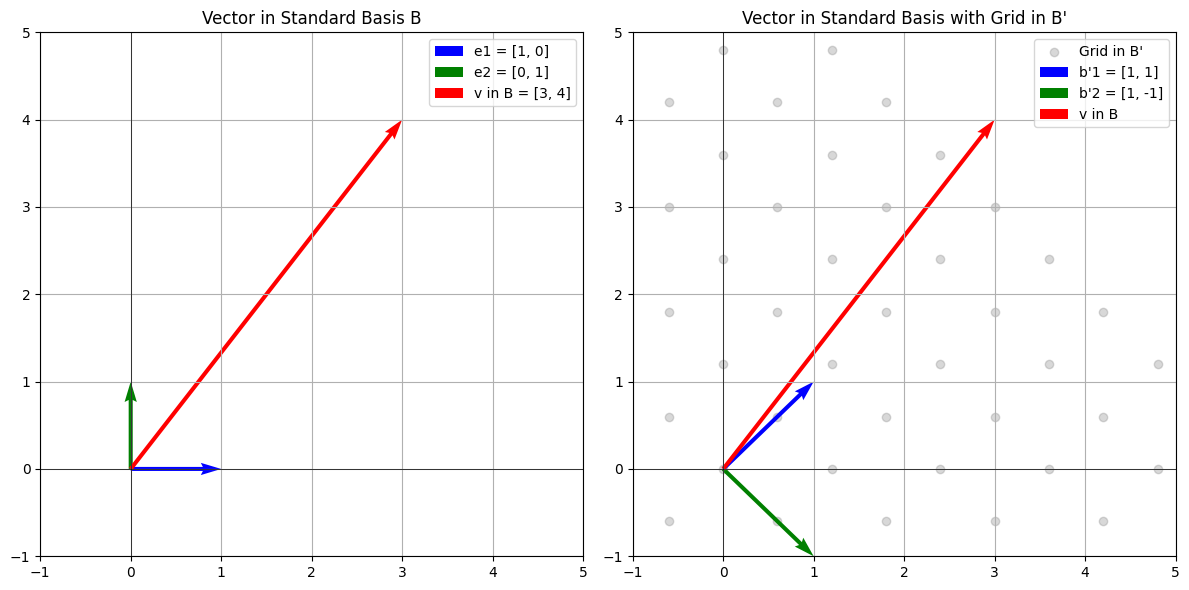

Change of basis matrix P:
 [[ 1  1]
 [ 1 -1]]
v in B: [3 4]
v in B': [ 3.5 -0.5]


In [8]:
# Vector in Different Bases Visualization
import numpy as np
import matplotlib.pyplot as plt

# Bases
B = np.eye(2)  # Standard basis (e1, e2)
B_prime = np.array([[1, 1], [1, -1]]).T  # New basis vectors as columns
P = B_prime  # Change of basis matrix (columns are new basis vectors)

# Vector v in standard basis B: [3, 4]
v_B = np.array([3, 4])

# v in B': v_B_prime = P^{-1} * v_B
P_inv = np.linalg.inv(P)
v_B_prime = P_inv @ v_B

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# --- Plot in standard basis B ---
ax[0].quiver(0, 0, B[0, 0], B[1, 0], angles='xy', scale_units='xy', scale=1,
             color='blue', label='e1 = [1, 0]')
ax[0].quiver(0, 0, B[0, 1], B[1, 1], angles='xy', scale_units='xy', scale=1,
             color='green', label='e2 = [0, 1]')
ax[0].quiver(0, 0, v_B[0], v_B[1], angles='xy', scale_units='xy', scale=1,
             color='red', label='v in B = [3, 4]')

ax[0].set_xlim(-1, 5)
ax[0].set_ylim(-1, 5)
ax[0].grid(True)
ax[0].axhline(0, color='black', linewidth=0.5)
ax[0].axvline(0, color='black', linewidth=0.5)
ax[0].set_title('Vector in Standard Basis B')
ax[0].legend()

# --- Plot in new basis B' ---
grid_x, grid_y = np.meshgrid(np.linspace(-3, 3, 11), np.linspace(-3, 3, 11))
grid_coords_B_prime = np.vstack([grid_x.ravel(), grid_y.ravel()])
grid_coords_B = P @ grid_coords_B_prime  # Transform grid to standard basis

ax[1].scatter(grid_coords_B[0], grid_coords_B[1], color='gray', alpha=0.3, label='Grid in B\'')
ax[1].quiver(0, 0, B_prime[0, 0], B_prime[1, 0], angles='xy', scale_units='xy', scale=1,
             color='blue', label="b'1 = [1, 1]")
ax[1].quiver(0, 0, B_prime[0, 1], B_prime[1, 1], angles='xy', scale_units='xy', scale=1,
             color='green', label="b'2 = [1, -1]")
ax[1].quiver(0, 0, v_B[0], v_B[1], angles='xy', scale_units='xy', scale=1,
             color='red', label='v in B')

ax[1].set_xlim(-1, 5)
ax[1].set_ylim(-1, 5)
ax[1].grid(True)
ax[1].axhline(0, color='black', linewidth=0.5)
ax[1].axvline(0, color='black', linewidth=0.5)
ax[1].set_title("Vector in Standard Basis with Grid in B'")
ax[1].legend()

plt.tight_layout()
plt.show()

# Print results
print('Change of basis matrix P:\n', P)
print('v in B:', v_B)
print("v in B':", v_B_prime.round(2))


**Visualization Explanation**: Left plot shows the vector v = [3, 4] in the standard basis B, with basis vectors e1 and e2. Right plot shows the same vector in the new basis B', where the grid is transformed according to P. The basis vectors of B' are shown, and the vector v appears in the context of the new grid, illustrating how the coordinate system changes while the vector remains the same in space.

### 2.2 Representing Transformations in Different Bases
**Definition**: A linear transformation T has matrix $\mathbf{A}$ in basis B and $\mathbf{A}'$ in basis B'.

**Formula**:
- $\mathbf{A}' = \mathbf{P}^{-1} \mathbf{A} \mathbf{P}$ (similarity transformation).

**Derivation**:
- In B: [T(v)]_B = A [v]_B.
- In B': [T(v)]_{B'} = A' [v]_{B'}.
- Since [v]_B = P [v]_{B'}, and [T(v)]_B = P [T(v)]_{B'}.
- Substitute: P [T(v)]_{B'} = A P [v]_{B'} \implies [T(v)]_{B'} = P^{-1} A P [v]_{B'}.

**Why Necessary**: Simplifies transformation matrices in appropriate bases.

**Example**: Shear A in B: [[1, 1], [0, 1]]. In B': P^{-1} A P.

**ML Use-Case**: In neural networks, change of basis represents transformations in different feature spaces.

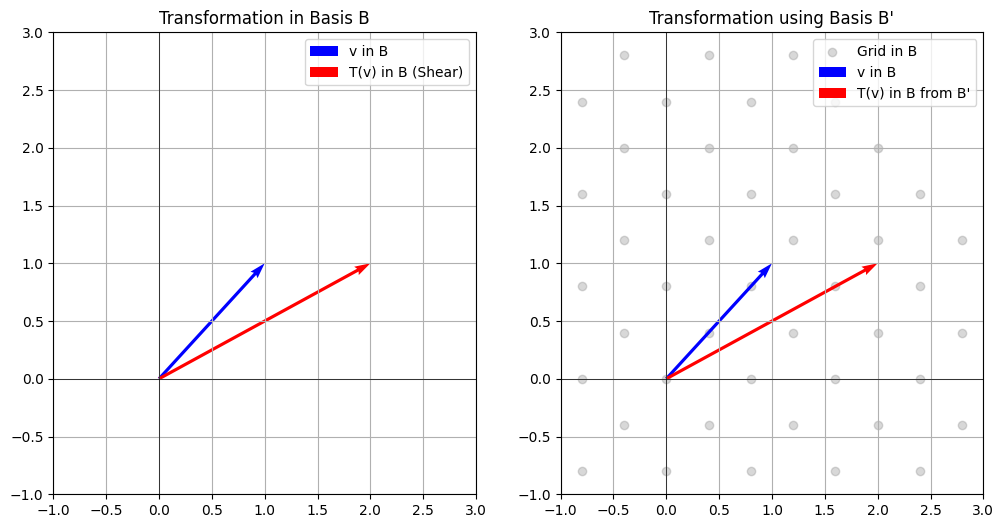

Shear in B:
 [[1 1]
 [0 1]]
Shear in B':
 [[ 1.5 -0.5]
 [ 0.5  0.5]]


In [10]:
# Transformation in Different Bases Visualization
import numpy as np
import matplotlib.pyplot as plt

# Bases and P
P = np.array([[1, 1], [1, -1]])
P_inv = np.linalg.inv(P)

# Shear transformation in B
A_shear_B = np.array([[1, 1], [0, 1]])
A_shear_B_prime = P_inv @ A_shear_B @ P

# Vector in B
v_B = np.array([1, 1])

# Apply transformation in B
Tv_B = A_shear_B @ v_B

# v in B'
v_B_prime = P_inv @ v_B

# Apply transformation in B'
Tv_B_prime = A_shear_B_prime @ v_B_prime

# Back to B for visualization
Tv_B_from_prime = P @ Tv_B_prime

# --- Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot in B
ax[0].quiver(0, 0, v_B[0], v_B[1], color='blue', angles='xy', scale_units='xy', scale=1, label='v in B')
ax[0].quiver(0, 0, Tv_B[0], Tv_B[1], color='red', angles='xy', scale_units='xy', scale=1, label='T(v) in B (Shear)')
ax[0].set_xlim(-1, 3)
ax[0].set_ylim(-1, 3)
ax[0].grid(True)
ax[0].axhline(0, color='black', linewidth=0.5)
ax[0].axvline(0, color='black', linewidth=0.5)
ax[0].set_title("Transformation in Basis B")
ax[0].legend()

# Plot in B' grid
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 11), np.linspace(-2, 2, 11))
grid_coords_B_prime = np.vstack([grid_x.ravel(), grid_y.ravel()])
grid_coords_B = P @ grid_coords_B_prime
ax[1].scatter(grid_coords_B[0], grid_coords_B[1], color='gray', alpha=0.3, label='Grid in B')
ax[1].quiver(0, 0, v_B[0], v_B[1], color='blue', angles='xy', scale_units='xy', scale=1, label='v in B')
ax[1].quiver(0, 0, Tv_B_from_prime[0], Tv_B_from_prime[1], color='red', angles='xy', scale_units='xy', scale=1,
             label="T(v) in B from B'")
ax[1].set_xlim(-1, 3)
ax[1].set_ylim(-1, 3)
ax[1].grid(True)
ax[1].axhline(0, color='black', linewidth=0.5)
ax[1].axvline(0, color='black', linewidth=0.5)
ax[1].set_title("Transformation using Basis B'")
ax[1].legend()

plt.show()

# Print results
print("Shear in B:\n", A_shear_B)
print("Shear in B':\n", A_shear_B_prime.round(2))


**Visualization Explanation**: Left plot shows the shear transformation in the standard basis B, transforming v = [1, 1] to T(v) = [2, 1]. Right plot shows the same transformation in the new basis B', where the grid is skewed, and the transformation is visualized in the context of B', illustrating how the matrix representation changes with the basis while the geometric effect remains the same.

### 2.3 Derivation for Vector Representation
**Derivation**: Consider vector v in basis B as [v]_B. In B', express v as B' c', where c' = [v]_{B'}. Since B' = B P, v = B P c'. But v = B c, so B c = B P c' \implies c = P c'.

**Why Necessary**: Enables seamless switching between coordinate systems for analysis.

### 2.4 Properties
- **Invertibility**: P is invertible as bases are independent.
- **Composition**: Multiple changes multiply matrices.
- **Dimension Preservation**: Bases have the same number of vectors.

## Relevance in Mathematics
- Coordinate transformation for optimal bases.
- Diagonalization to simplify matrices.
- Geometric flexibility for problem-solving.

## Relevance in ML
- Optimizes representations in PCA.
- Simplifies models by diagonalizing matrices.
- Handles transformations in feature spaces.

## Applications and Practical Use-Cases
- **PCA**: Changes basis to principal components for reduction.
- **Neural Networks**: Transforms inputs to new bases in layers.
- **Computer Graphics**: Changes basis for rotations/shears.
- **Quantum Computing**: Changes basis for qubit states.

## Practical Implementation in ML
Below is Python code for change of basis and transformation representation.

In [11]:
# Practical Implementation
import numpy as np

# Bases
P = np.array([[1, 1], [1, -1]])
P_inv = np.linalg.inv(P)

# Vector in B
v_B = np.array([3, 4])
v_B_prime = P_inv @ v_B

# Shear in B
A_shear_B = np.array([[1, 1], [0, 1]])
A_shear_B_prime = P_inv @ A_shear_B @ P

print("v in B':", v_B_prime.round(2))
print("Shear in B':\n", A_shear_B_prime.round(2))

# Rotation in B (90° rotation)
A_rotation_B = np.array([[0, -1], [1, 0]])
A_rotation_B_prime = P_inv @ A_rotation_B @ P

print("Rotation in B':\n", A_rotation_B_prime.round(2))


v in B': [ 3.5 -0.5]
Shear in B':
 [[ 1.5 -0.5]
 [ 0.5  0.5]]
Rotation in B':
 [[ 0.  1.]
 [-1.  0.]]


## Summary
- **Key Concepts**: Changes coordinates between bases using P and P^{-1}, transforming vectors and matrices.
- **Mathematical Significance**: Simplifies representations and computations.
- **AI/ML Relevance**: Optimizes data and transformations.
- **Next Steps**: Practice with basis changes and visualizations.

## Why Change of Basis Matters in AI/ML
Enables efficient data representations, simplifies models, and adapts transformations.